In [1]:
pip install camb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 22.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for camb: filename=camb-1.5.0-py3-none-any.whl size=1064772 sha256=07022c6095c6544336eb40a4fe494bd9f84b6af58365aa30731378bd66171ab7
  Stored in directory: /root/.cache/pip/wheels/56/8e/da/c29f503739e0e2dcf9b93784cd7067004e33cd930449600c50
Successfully built camb


In [2]:
# Copiando as informações que tem no tutorial
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys, platform, os
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import camb
from camb import model, initialpower
print('Using CAMB %s installed at %s'%(camb.__version__,os.path.dirname(camb.__file__)))

Using CAMB 1.5.0 installed at /usr/local/lib/python3.10/dist-packages/camb


## Questão 1:
Primeiro determinar os parâmetros de acordo com o tutorial

In [3]:
# As informações apresentadas na lista:
h = 0.68
omcdm = 0.26
omb = 0.05
oml = 0.69

In [4]:
# Encontrando os novos parâmetros de acordo com o CAMB:
pars = camb.CAMBparams()
pars.set_cosmology(H0 = 68, ombh2 = omb * h**2, omch2 = omcdm * h**2)
pars.InitPower.set_params(As = 2.1e-9, ns = 0.96, r = 0)
pars.set_for_lmax(200, lens_potential_accuracy=0) # De acordo com o valor pedido na questão 3
pars.set_dark_energy(w = -1.0)

class: <CAMBparams>
 WantCls = True
 WantTransfer = False
 WantScalars = True
 WantTensors = False
 WantVectors = False
 WantDerivedParameters = True
 Want_cl_2D_array = True
 Want_CMB = True
 Want_CMB_lensing = True
 DoLensing = True
 NonLinear = NonLinear_none
 Transfer: <TransferParams>
   high_precision = False
   accurate_massive_neutrinos = False
   kmax = 0.9
   k_per_logint = 0
   PK_num_redshifts = 1
   PK_redshifts = [0.0]
 want_zstar = False
 want_zdrag = False
 min_l = 2
 max_l = 350
 max_l_tensor = 600
 max_eta_k = 875.0
 max_eta_k_tensor = 1200.0
 ombh2 = 0.023120000000000005
 omch2 = 0.12022400000000003
 omk = 0.0
 omnuh2 = 0.000644866570625114
 H0 = 68.0
 TCMB = 2.7255
 YHe = 0.24617091345456754
 num_nu_massless = 2.0293333333333337
 num_nu_massive = 1
 nu_mass_eigenstates = 1
 share_delta_neff = False
 nu_mass_degeneracies = [1.0146666666666666]
 nu_mass_fractions = [1.0]
 nu_mass_numbers = [1]
 InitPower: <InitialPowerLaw>
   tensor_parameterization = tensor_param_rpi

Part 1:
Compute the dark matter density fluctuation power spectrum P(k) at z = 2.0 using
the Limber approximation.

In [5]:
z = 2.0
kmax = 2000

In [6]:
resultsL = camb.get_background(pars)
PKlimber = camb.get_matter_power_interpolator(pars, nonlinear=True,
    hubble_units=False, k_hunit=False, kmax=kmax,
    var1=model.Transfer_Weyl,var2=model.Transfer_Weyl, zmax=z)

/usr/local/lib/python3.10/dist-packages/camb/results.py:965: RuntimeWarning: invalid value encountered in log
  return self.logsign * np.exp(self(z, np.log(kh), grid=grid))


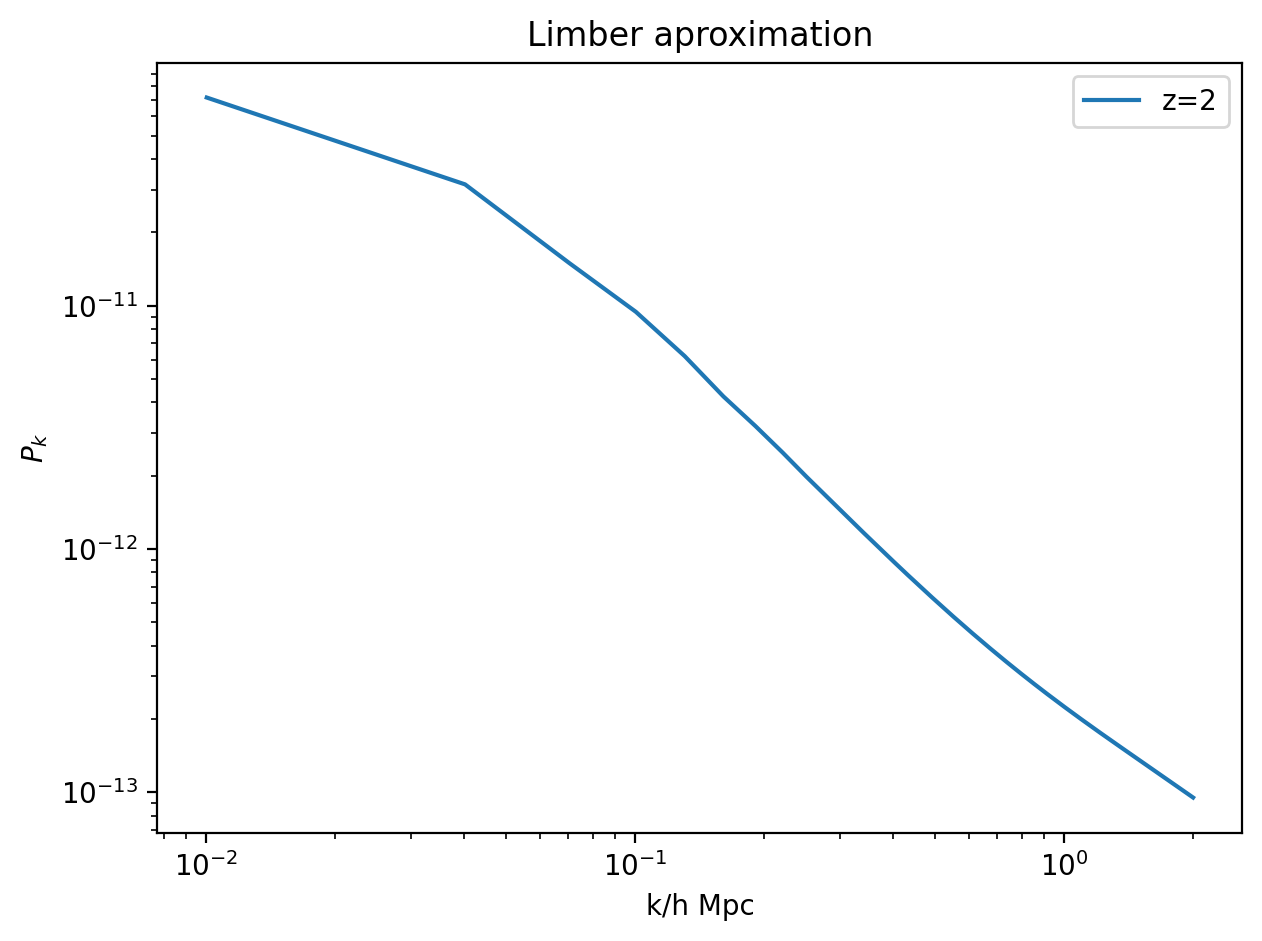

In [7]:
plt.figure(figsize=(7,5))
k = np.linspace(-4,2,200)
plt.loglog(k, PKlimber.P(z,k))
plt.xlabel('k/h Mpc')
plt.ylabel('$P_{k}$')
plt.legend(['z=2'])
plt.title('Limber aproximation');

Part 2: linear aproximation

In [8]:
pars.NonLinear = model.NonLinear_none
results = camb.get_results(pars)

In [9]:
PKlinear = camb.get_matter_power_interpolator(pars, nonlinear=False,
    hubble_units = False, k_hunit = False, kmax=kmax,
    var1 = model.Transfer_Weyl,var2=model.Transfer_Weyl, zmax=z)

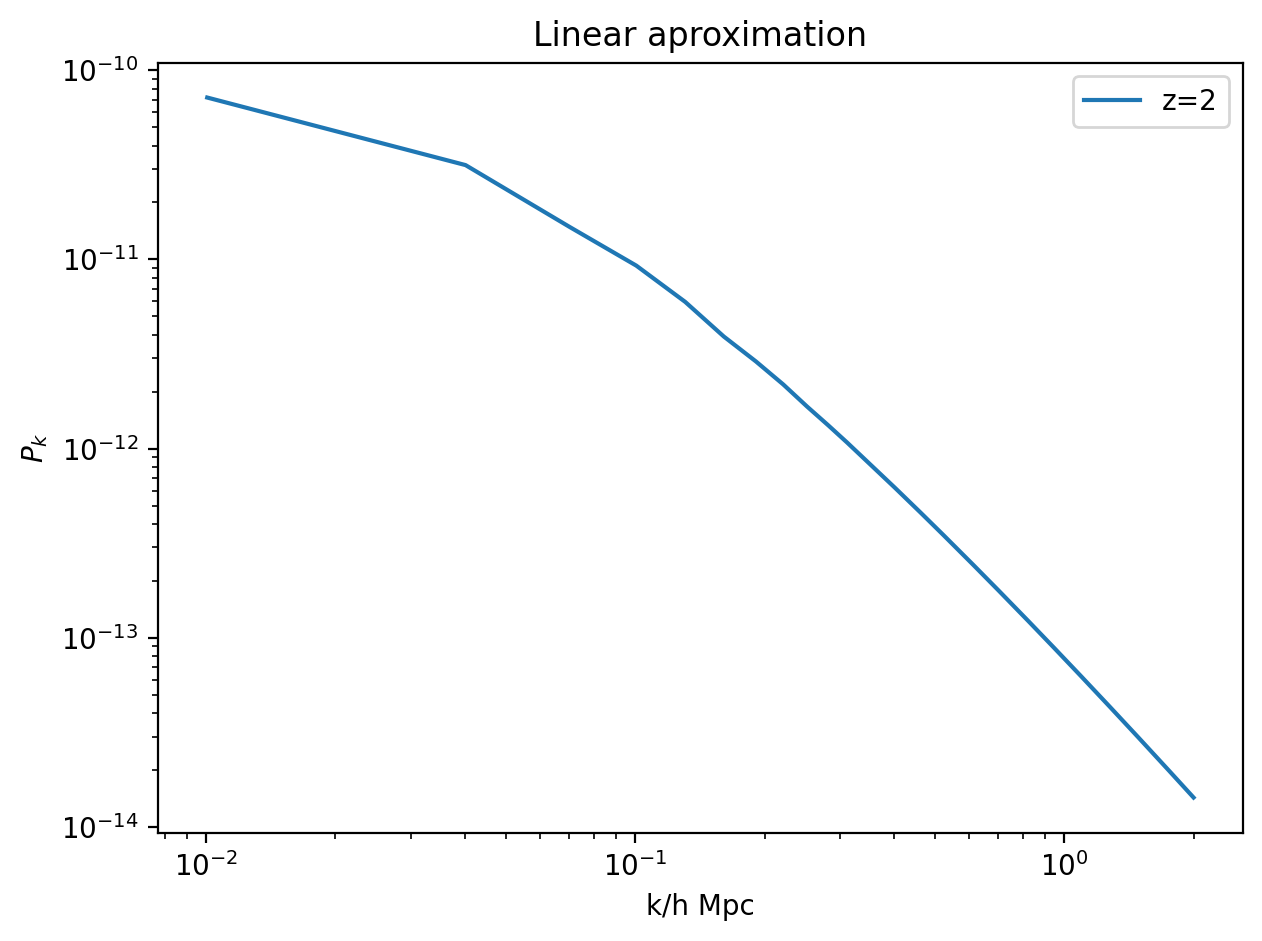

In [10]:
plt.figure(figsize=(7,5))
k = np.linspace(-4,2,200)
plt.loglog(k, PKlinear.P(z,k))
plt.xlabel('k/h Mpc')
plt.ylabel('$P_{k}$')
plt.legend(['z=2'])
plt.title('Linear aproximation');

Part 3: non-linear aproximation



In [11]:
pars.set_matter_power(redshifts=[2.0], kmax=2000)
pars.NonLinearModel.set_params(halofit_version='original')

In [12]:
results.calc_power_spectra(pars)
kh_nonlin, z_nonlin, PKnonlin = results.get_nonlinear_matter_power_spectrum(params=pars)

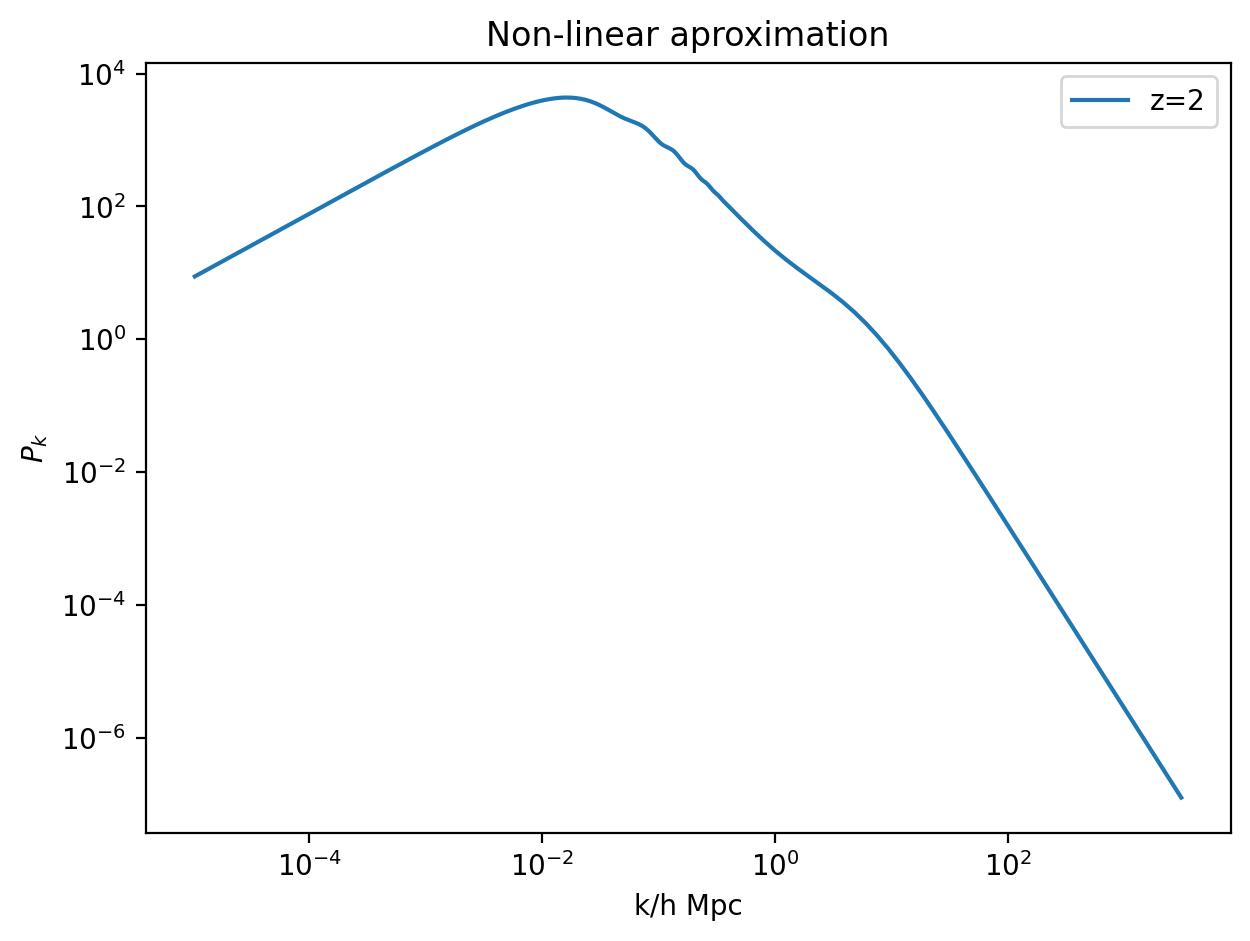

In [13]:
plt.figure(figsize=(7,5))
for i, (redshift, line) in enumerate(zip(z_nonlin,['-','--'])):
    plt.loglog(kh_nonlin, PKnonlin[i,:], ls = line)
plt.xlabel('k/h Mpc')
plt.ylabel('$P_{k}$')
plt.legend(['z=2'])
plt.title('Non-linear aproximation');

Várias tentativas que não deram certo

In [14]:
#tentando da forma anterior
pars.set_matter_power(redshifts=[2.0], kmax=2000)
pars.NonLinear = model.NonLinear_both
pars.NonLinearModel.set_params(halofit_version='original')
results.calc_power_spectra(pars)
PKnl = camb.get_matter_power_interpolator(pars, nonlinear=True,
    hubble_units = False, k_hunit = False, kmax=kmax,
    var1 = model.Transfer_Weyl,var2=model.Transfer_Weyl, zmax=z)

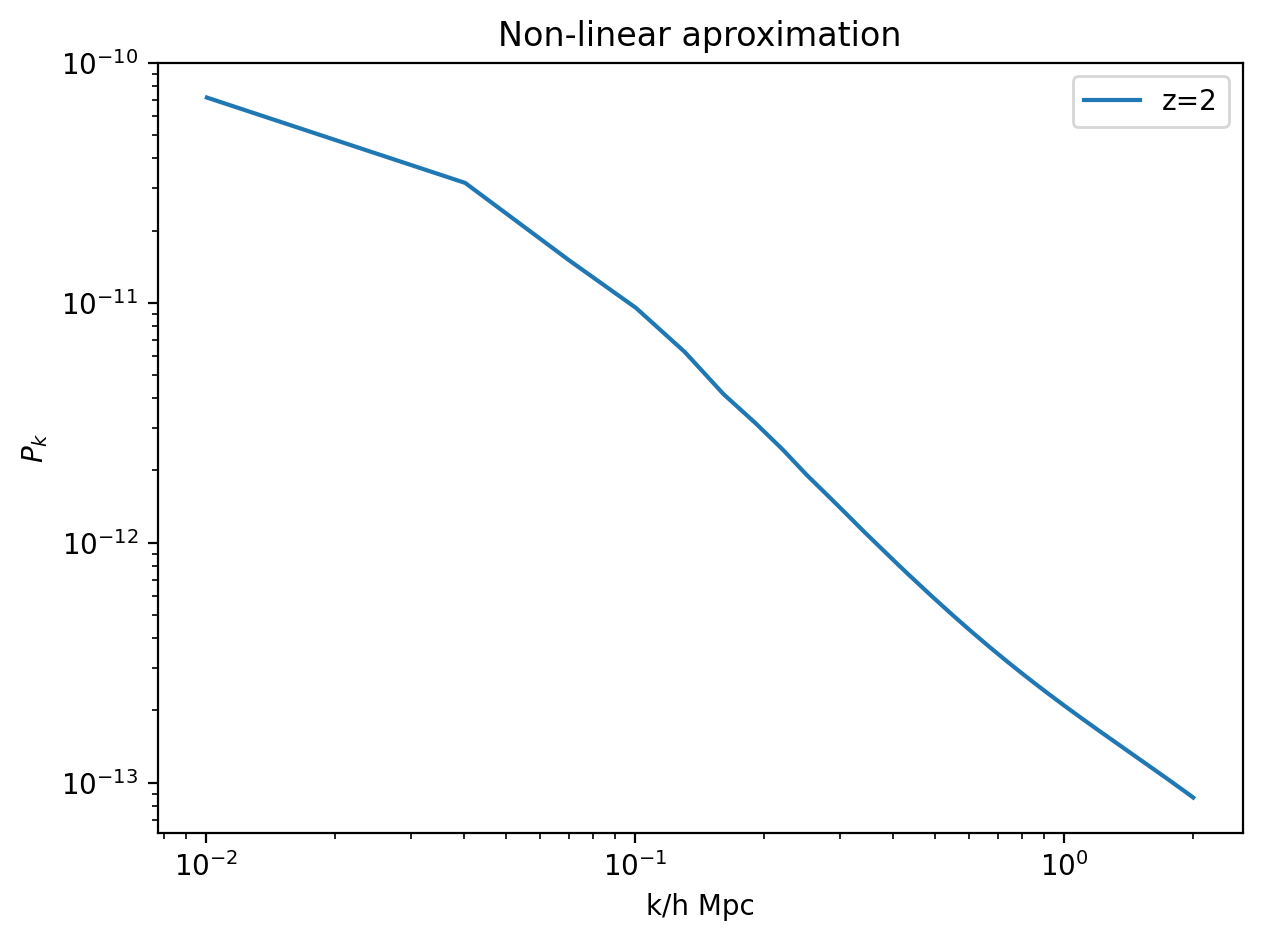

In [15]:
plt.figure(figsize=(7,5))
k = np.linspace(-4,2,200)
plt.loglog(k, PKnl.P(z,k))
plt.xlabel('k/h Mpc')
plt.ylabel('$P_{k}$')
plt.legend(['z=2'])
plt.title('Non-linear aproximation');

## O de cima foi uma tentativa que deu errado, usarei essa ultima para o caso não linear

Difference:

Text(0, 0.5, '$P_{k}$')

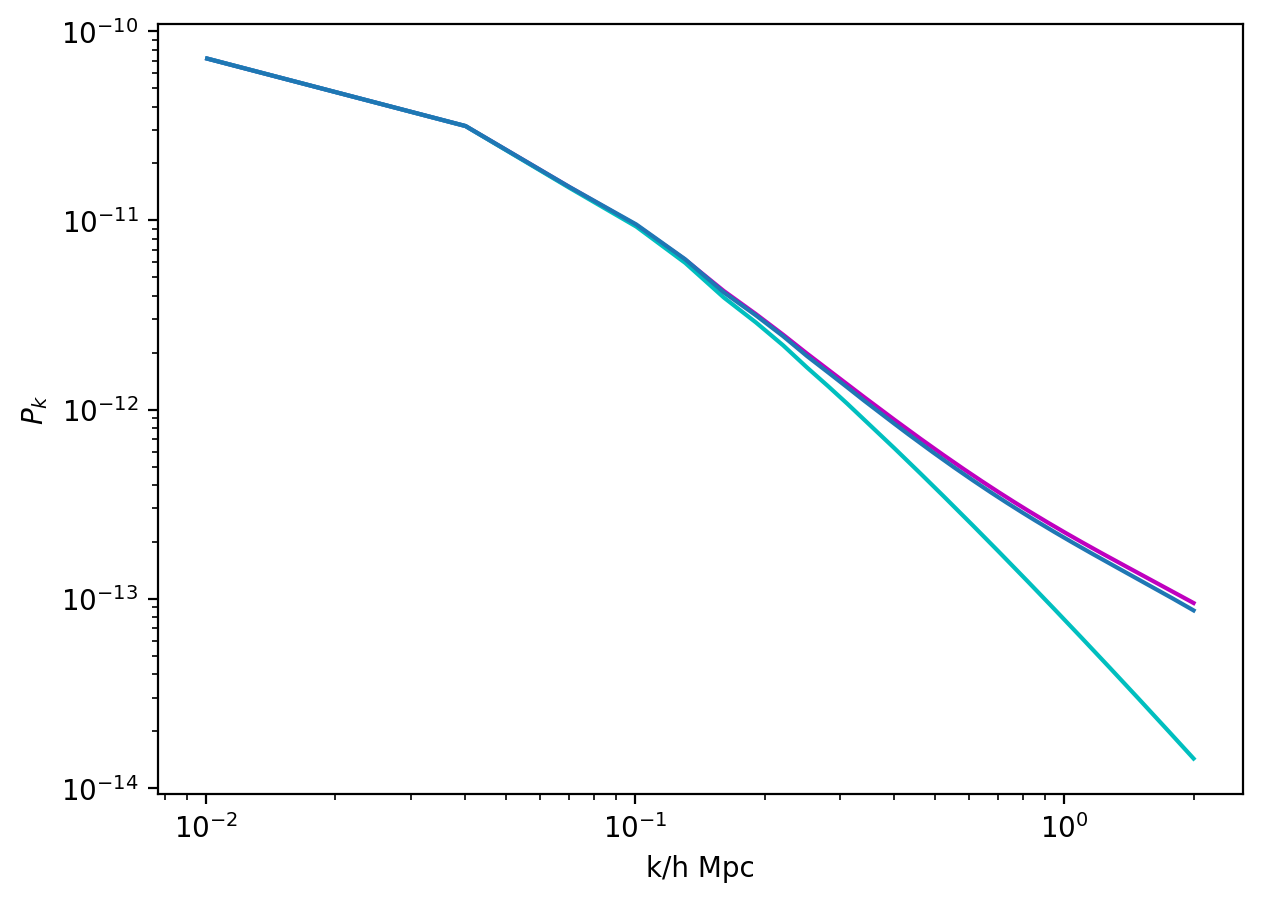

In [16]:
plt.figure(figsize=(7,5))
k = np.linspace(-4,2,200)
plt.loglog(k, PKlimber.P(z,k), color='m')
plt.loglog(k, PKlinear.P(z,k), color='c')
plt.loglog(k, PKnl.P(z,k))
plt.xlabel('k/h Mpc')
plt.ylabel('$P_{k}$')

Começam a divergir um pouco depois de k/h Mpc passar do valor de 10**-1, sendo a não linear e a limber bastante próximas

## Questão 2
z = 0.2 e z = 1

In [17]:
pars = camb.CAMBparams()
pars.set_cosmology(H0 = 68, ombh2 = omb * h**2, omch2 = omcdm * h**2)
pars.InitPower.set_params(As = 2.1e-9, ns = 0.96, r = 0)
pars.set_for_lmax(200, lens_potential_accuracy=0) # De acordo com o valor pedido na questão 3
pars.set_dark_energy(w = -1.0)

class: <CAMBparams>
 WantCls = True
 WantTransfer = False
 WantScalars = True
 WantTensors = False
 WantVectors = False
 WantDerivedParameters = True
 Want_cl_2D_array = True
 Want_CMB = True
 Want_CMB_lensing = True
 DoLensing = True
 NonLinear = NonLinear_none
 Transfer: <TransferParams>
   high_precision = False
   accurate_massive_neutrinos = False
   kmax = 0.9
   k_per_logint = 0
   PK_num_redshifts = 1
   PK_redshifts = [0.0]
 want_zstar = False
 want_zdrag = False
 min_l = 2
 max_l = 350
 max_l_tensor = 600
 max_eta_k = 875.0
 max_eta_k_tensor = 1200.0
 ombh2 = 0.023120000000000005
 omch2 = 0.12022400000000003
 omk = 0.0
 omnuh2 = 0.000644866570625114
 H0 = 68.0
 TCMB = 2.7255
 YHe = 0.24617091345456754
 num_nu_massless = 2.0293333333333337
 num_nu_massive = 1
 nu_mass_eigenstates = 1
 share_delta_neff = False
 nu_mass_degeneracies = [1.0146666666666666]
 nu_mass_fractions = [1.0]
 nu_mass_numbers = [1]
 InitPower: <InitialPowerLaw>
   tensor_parameterization = tensor_param_rpi

In [18]:
z = 0.2
kmax = 2000

Limber 0.2

In [19]:
resultsL = camb.get_background(pars)
PKlimber2 = camb.get_matter_power_interpolator(pars, nonlinear=True,
    hubble_units=False, k_hunit=False, kmax=kmax,
    var1=model.Transfer_Weyl,var2=model.Transfer_Weyl, zmax=z)

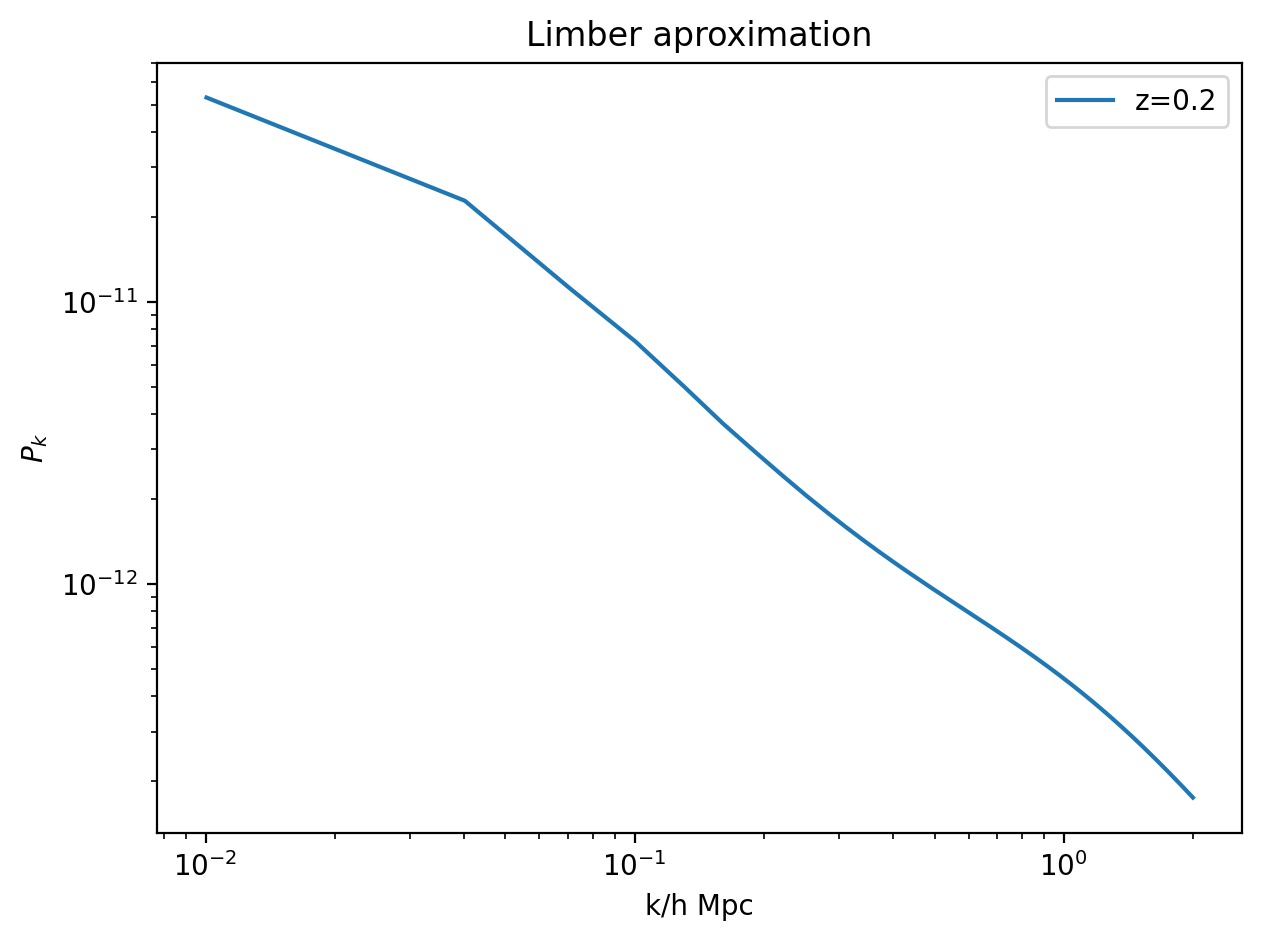

In [20]:
plt.figure(figsize=(7,5))
k = np.linspace(-4,2,200)
plt.loglog(k, PKlimber2.P(z,k))
plt.xlabel('k/h Mpc')
plt.ylabel('$P_{k}$')
plt.legend(['z=0.2'])
plt.title('Limber aproximation');

Linear 0.2

In [21]:
pars.NonLinear = model.NonLinear_none
results = camb.get_results(pars)

In [22]:
PKlinear2 = camb.get_matter_power_interpolator(pars, nonlinear=False,
    hubble_units = False, k_hunit = False, kmax=kmax,
    var1 = model.Transfer_Weyl,var2=model.Transfer_Weyl, zmax=z)

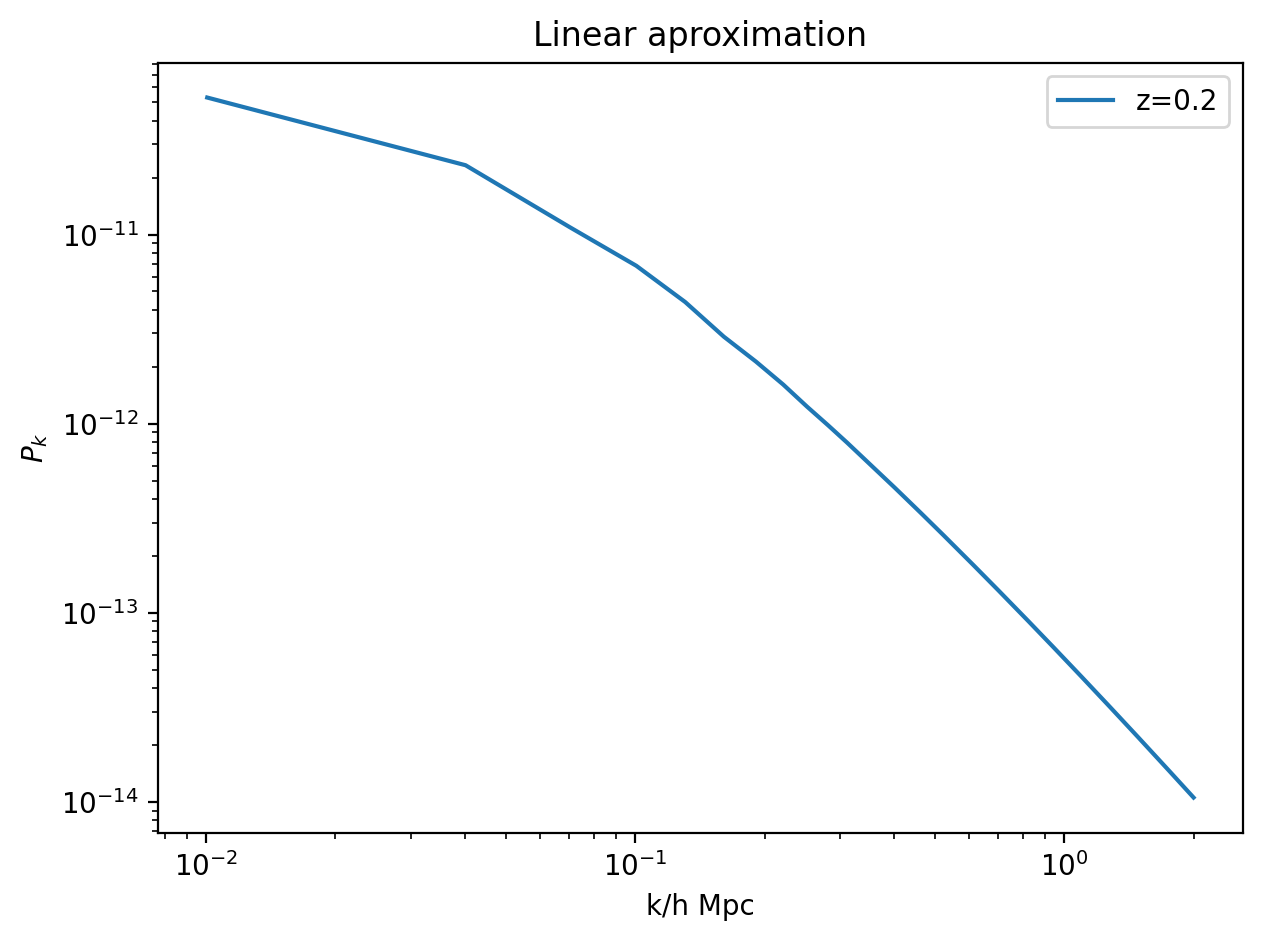

In [23]:
plt.figure(figsize=(7,5))
k = np.linspace(-4,2,200)
plt.loglog(k, PKlinear2.P(z,k))
plt.xlabel('k/h Mpc')
plt.ylabel('$P_{k}$')
plt.lz = 0.2
plt.legend(['z=0.2'])
plt.title('Linear aproximation');

Não linear 0.2

In [24]:
pars.set_matter_power(redshifts=[0.2], kmax=2000)
pars.NonLinear = model.NonLinear_both
pars.NonLinearModel.set_params(halofit_version='original')
results.calc_power_spectra(pars)

In [25]:
PKnl2 = camb.get_matter_power_interpolator(pars, nonlinear=True,
    hubble_units = False, k_hunit = False, kmax=kmax,
    var1 = model.Transfer_Weyl,var2=model.Transfer_Weyl, zmax=z)

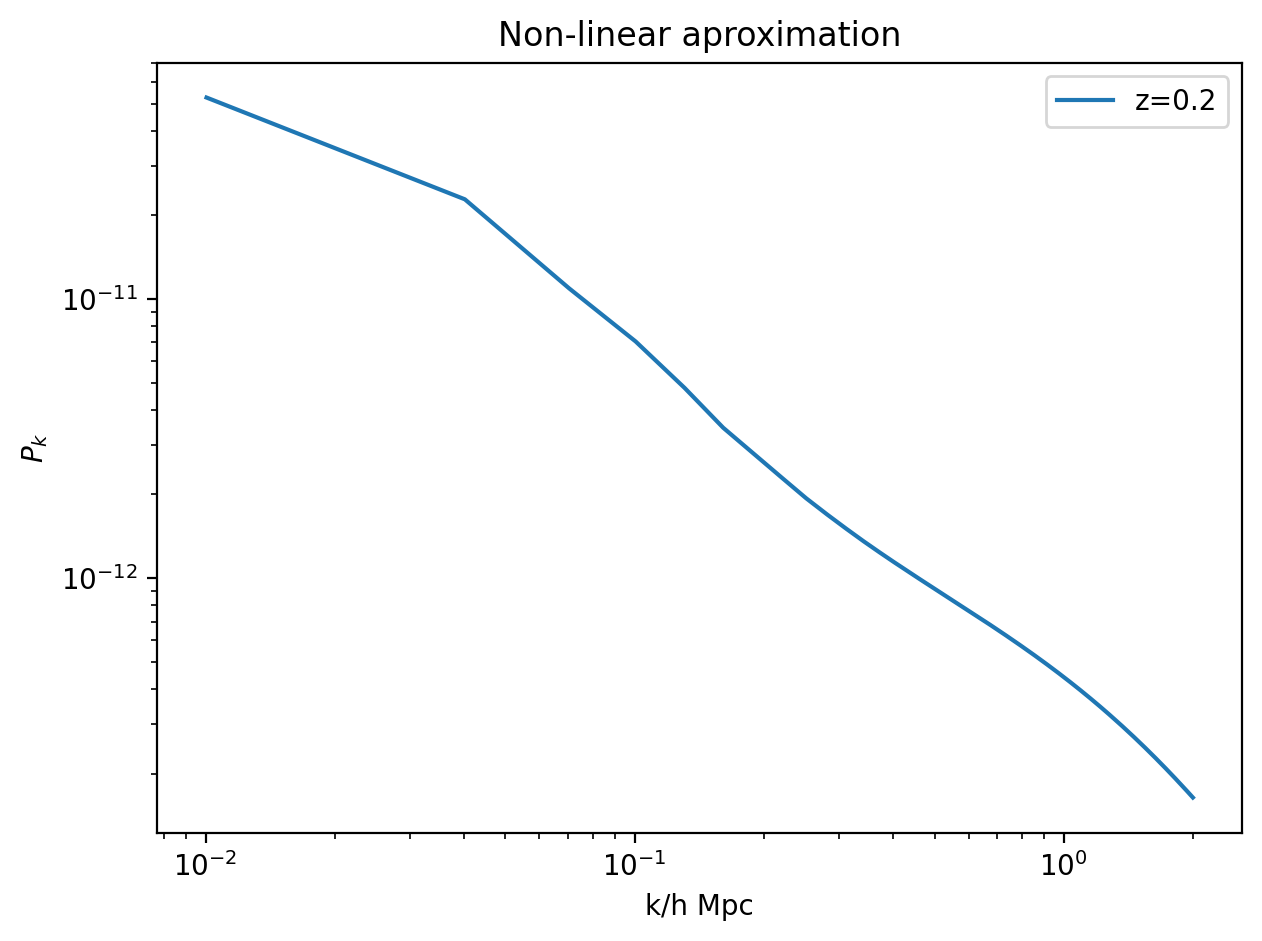

In [26]:
plt.figure(figsize=(7,5))
k = np.linspace(-4,2,200)
plt.loglog(k, PKnl2.P(z,k))
plt.xlabel('k/h Mpc')
plt.ylabel('$P_{k}$')
plt.legend(['z=0.2'])
plt.title('Non-linear aproximation');

Diferença

Text(0, 0.5, '$P_{k}$')

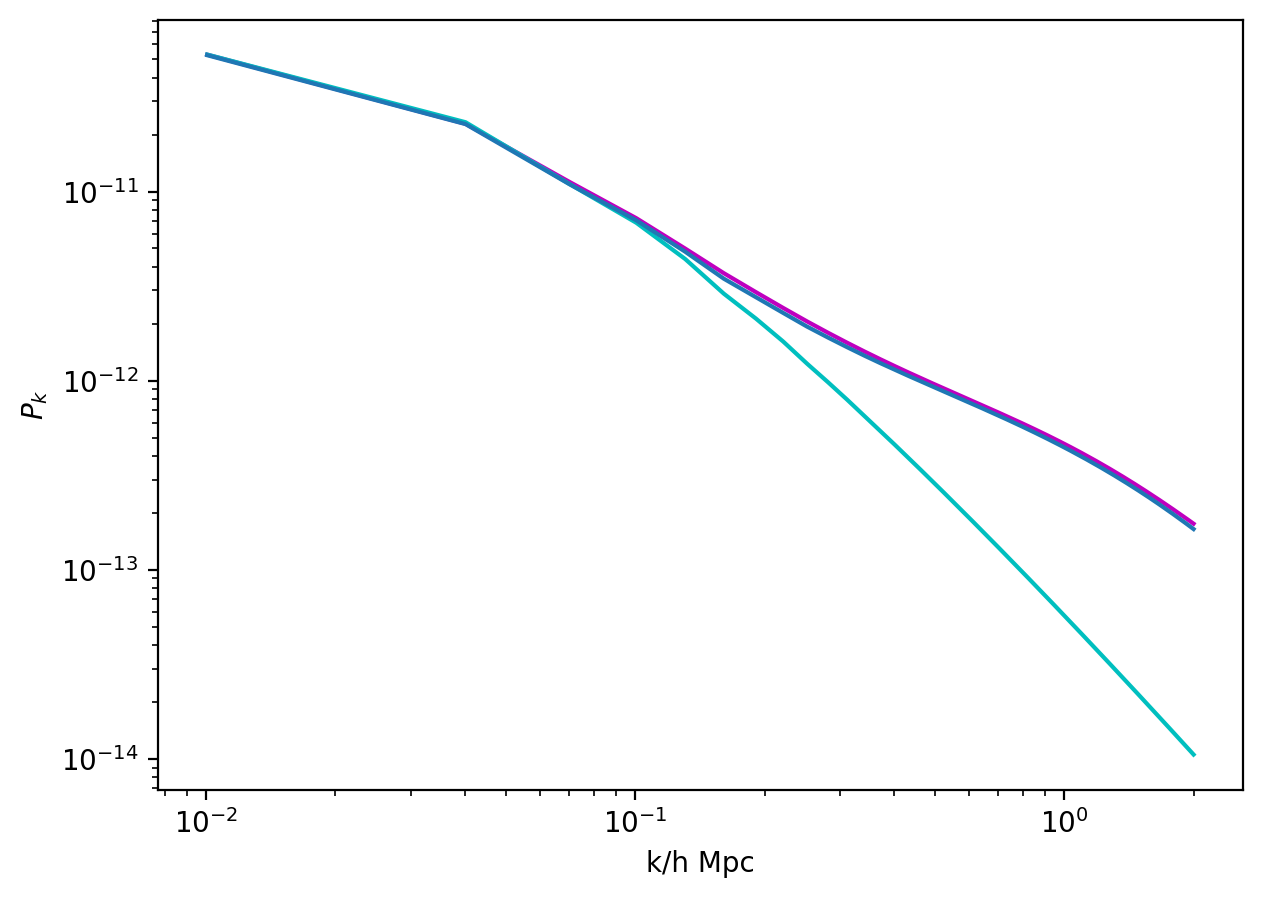

In [28]:
plt.figure(figsize=(7,5))
k = np.linspace(-4,2,200)
plt.loglog(k, PKlimber2.P(z,k), color='m')
plt.loglog(k, PKlinear2.P(z,k), color='c')
plt.loglog(k, PKnl2.P(z,k))
plt.xlabel('k/h Mpc')
plt.ylabel('$P_{k}$')

Bem parecido com o caso anterior. Começam a divergir quase exatamente em k/h Mpc ter o valor de 10**-1, sendo a não linear e a limber bastante próximas

**z = 1.0**

In [ ]:
pars = camb.CAMBparams()
pars.set_cosmology(H0 = 68, ombh2 = omb * h**2, omch2 = omcdm * h**2)
pars.InitPower.set_params(As = 2.1e-9, ns = 0.96, r = 0)
pars.set_for_lmax(200, lens_potential_accuracy=0) # De acordo com o valor pedido na questão 3
pars.set_dark_energy(w = -1.0)

In [30]:
z = 1.0
kmax = 2000

Limber 1.0

In [31]:
resultsL = camb.get_background(pars)
PKlimber3 = camb.get_matter_power_interpolator(pars, nonlinear=True,
    hubble_units=False, k_hunit=False, kmax=kmax,
    var1=model.Transfer_Weyl,var2=model.Transfer_Weyl, zmax=z)

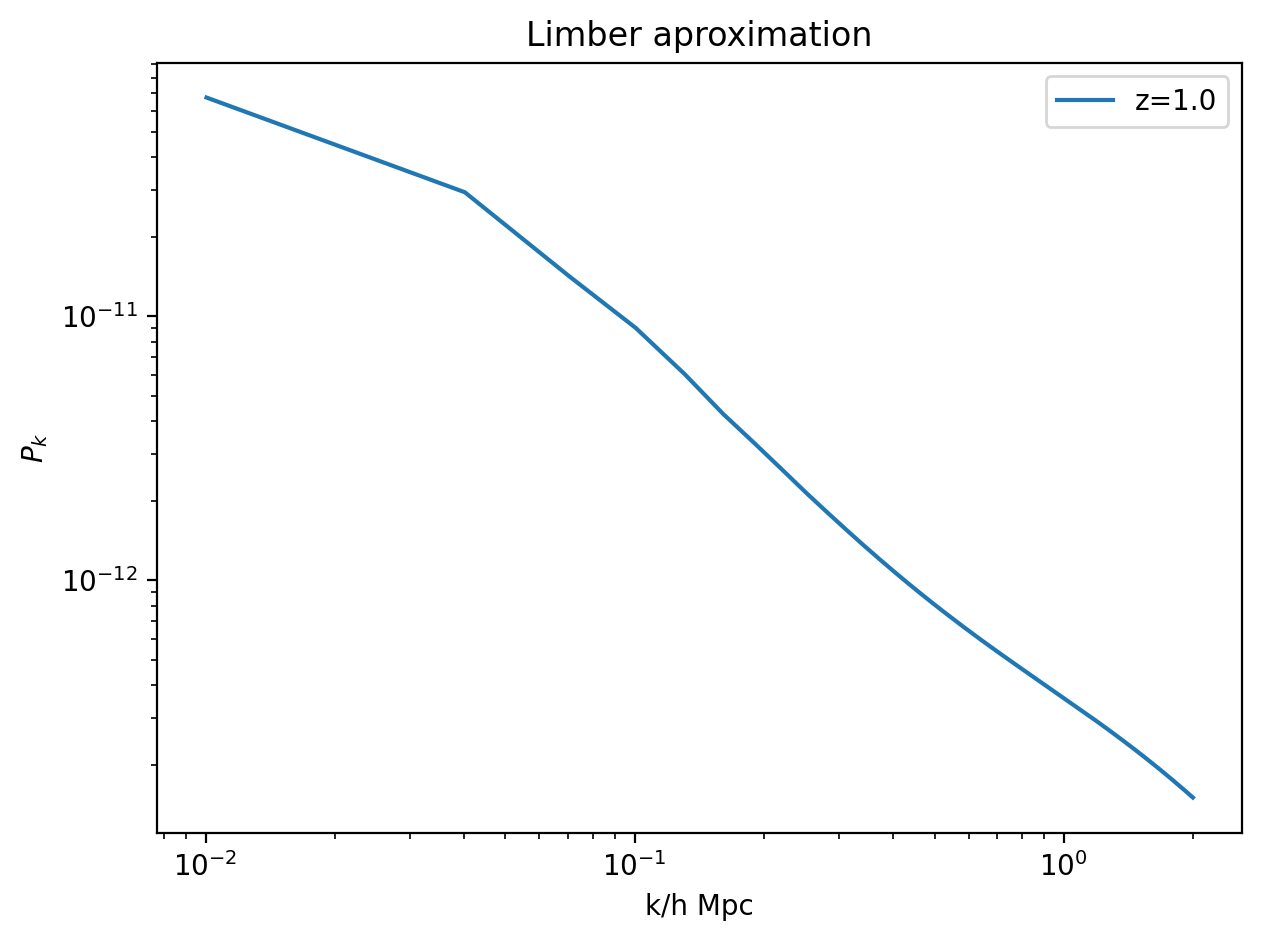

In [42]:
plt.figure(figsize=(7,5))
k = np.linspace(-4,2,200)
plt.loglog(k, PKlimber3.P(z,k))
plt.xlabel('k/h Mpc')
plt.ylabel('$P_{k}$')
plt.legend(['z=1.0'])
plt.title('Limber aproximation');

Linear 1.0

In [33]:
pars.NonLinear = model.NonLinear_none
results = camb.get_results(pars)

In [34]:
PKlinear3 = camb.get_matter_power_interpolator(pars, nonlinear=False,
    hubble_units = False, k_hunit = False, kmax=kmax,
    var1 = model.Transfer_Weyl,var2=model.Transfer_Weyl, zmax=z)

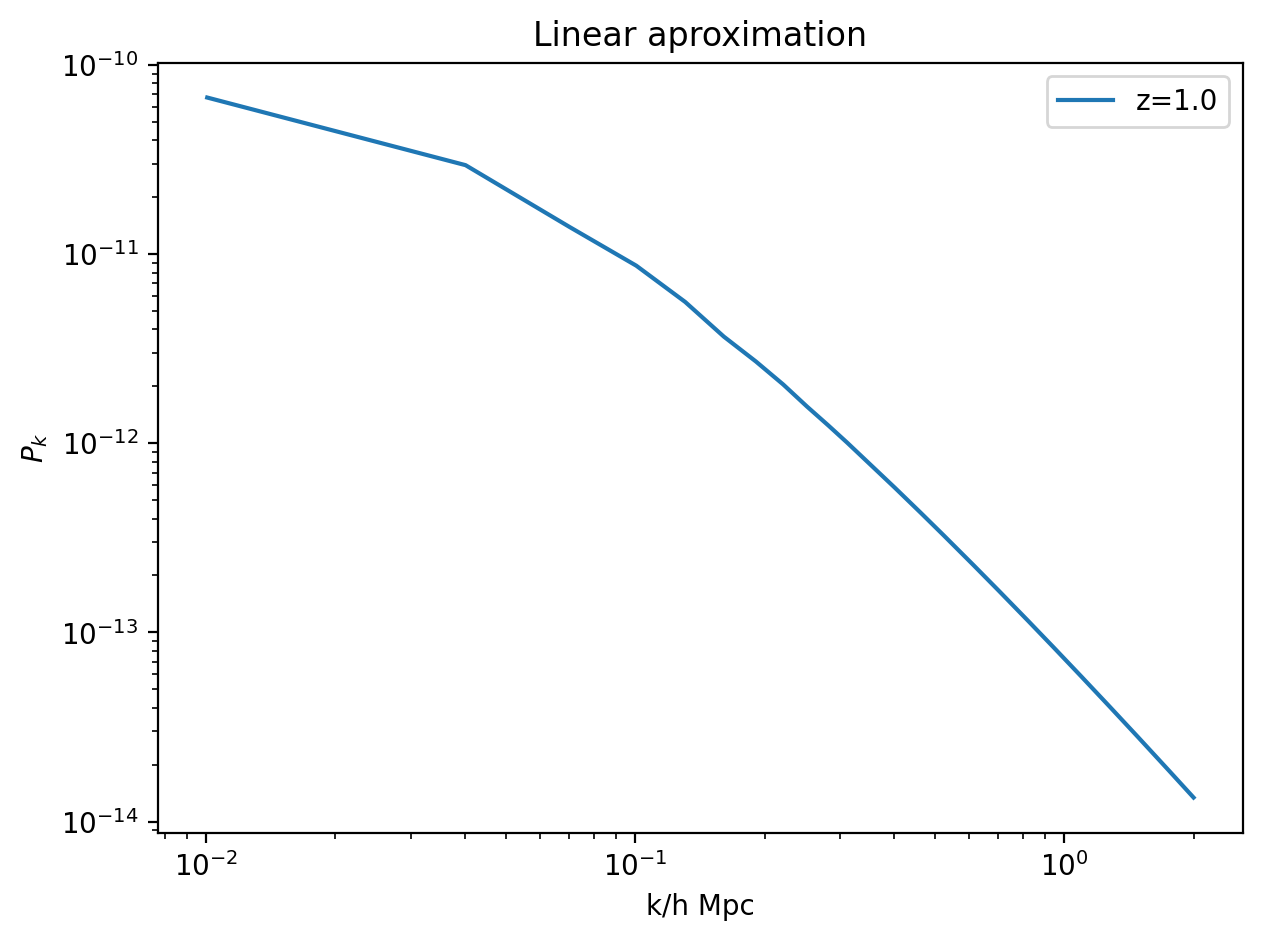

In [43]:
plt.figure(figsize=(7,5))
k = np.linspace(-4,2,200)
plt.loglog(k, PKlinear3.P(z,k))
plt.xlabel('k/h Mpc')
plt.ylabel('$P_{k}$')
plt.lz = 0.2
plt.legend(['z=1.0'])
plt.title('Linear aproximation');

Não-linear 1.0

In [37]:
pars.set_matter_power(redshifts=[0.2], kmax=2000)
pars.NonLinear = model.NonLinear_both
pars.NonLinearModel.set_params(halofit_version='original')
results.calc_power_spectra(pars)

In [38]:
PKnl3 = camb.get_matter_power_interpolator(pars, nonlinear=True,
    hubble_units = False, k_hunit = False, kmax=kmax,
    var1 = model.Transfer_Weyl,var2=model.Transfer_Weyl, zmax=z)

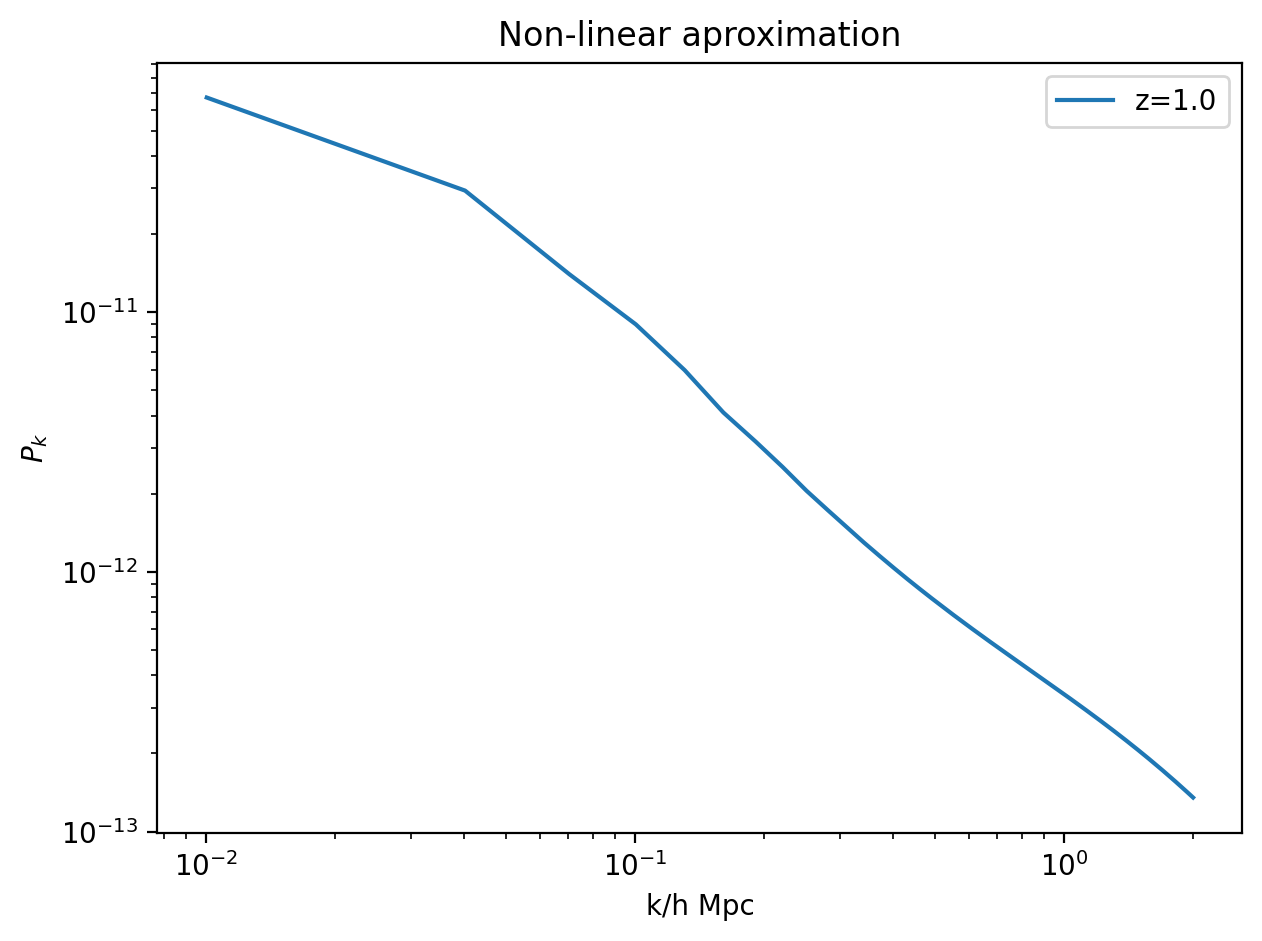

In [44]:
plt.figure(figsize=(7,5))
k = np.linspace(-4,2,200)
plt.loglog(k, PKnl3.P(z,k))
plt.xlabel('k/h Mpc')
plt.ylabel('$P_{k}$')
plt.legend(['z=1.0'])
plt.title('Non-linear aproximation');

Diferença

Text(0, 0.5, '$P_{k}$')

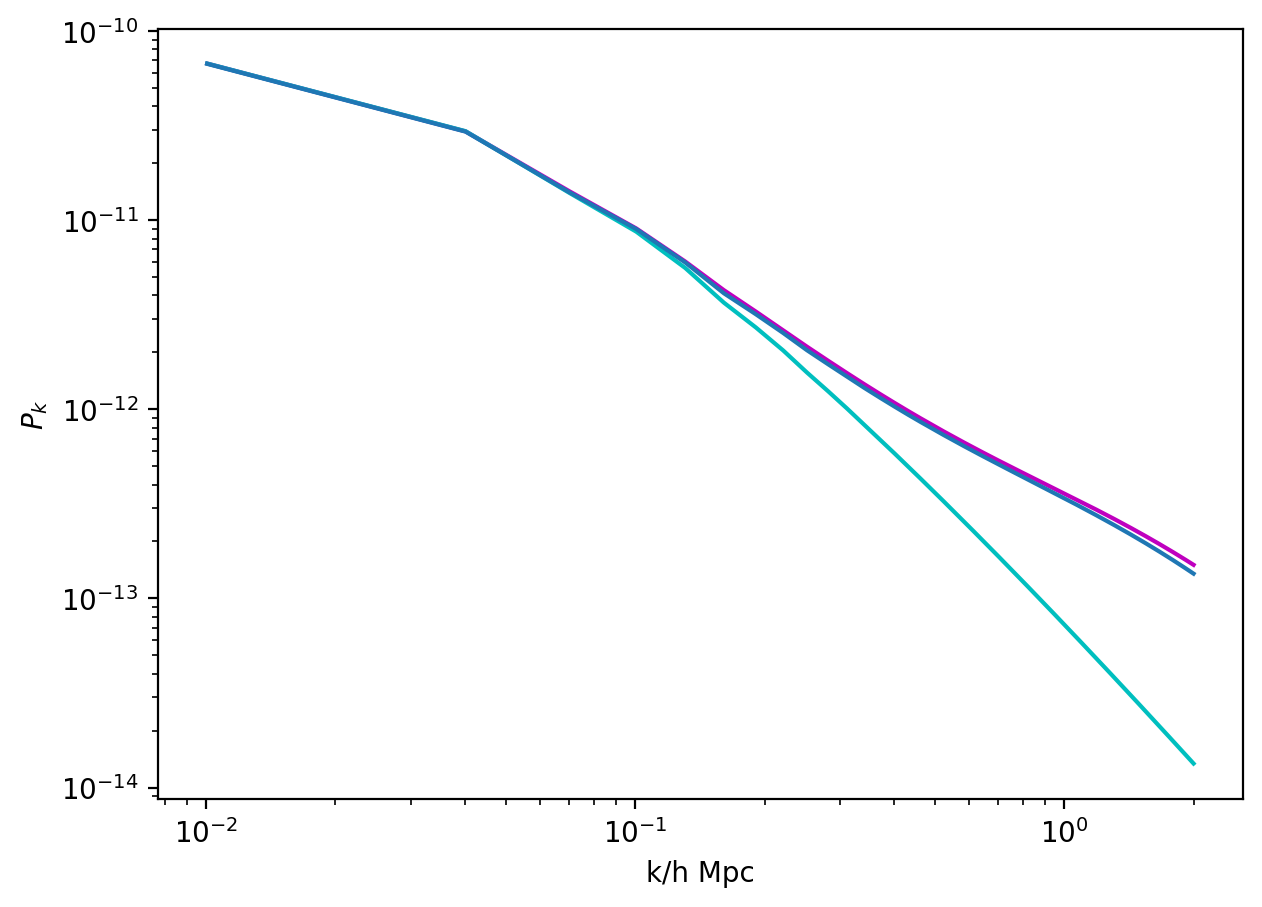

In [45]:
plt.figure(figsize=(7,5))
k = np.linspace(-4,2,200)
plt.loglog(k, PKlimber3.P(z,k), color='m')
plt.loglog(k, PKlinear3.P(z,k), color='c')
plt.loglog(k, PKnl3.P(z,k))
plt.xlabel('k/h Mpc')
plt.ylabel('$P_{k}$')

Bem parecido com os casos anteriores, a divergencia proxima do 10**-1, e o linear variando mais do que os outros